In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files 
files.upload()

Saving salaries.csv to salaries.csv


{'salaries.csv': b'company,job,degree,salary_more_then_100k\ngoogle,sales executive,bachelors,0\ngoogle,sales executive,masters,0\ngoogle,business manager,bachelors,1\ngoogle,business manager,masters,1\ngoogle,computer programmer,bachelors,0\ngoogle,computer programmer,masters,1\nabc pharma,sales executive,masters,0\nabc pharma,computer programmer,bachelors,0\nabc pharma,business manager,bachelors,0\nabc pharma,business manager,masters,1\nfacebook,sales executive,bachelors,1\nfacebook,sales executive,masters,1\nfacebook,business manager,bachelors,1\nfacebook,business manager,masters,1\nfacebook,computer programmer,bachelors,1\nfacebook,computer programmer,masters,1'}

In [3]:
df = pd.read_csv("salaries.csv", sep=",")
df.head(2)

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0


In [13]:
#deciding input and target variables
#droping target variable
inputs = df.drop("salary_more_then_100k", axis="columns")
inputs.head(2)

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters


In [7]:
target = df["salary_more_then_100k"]
target;

In [11]:
#converting levels in numbers
#two ways to do that
#1. level encoding
#2. OneHotEncoding
# in decision tree ,OneHotEncoding isn't needed as simple
# level encoding works quite fine
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [14]:
#As df has compnay columns
# fit_transform... train it first then transform then store in new
# columns
inputs["company_n"] = le_company.fit_transform(inputs["company"])
inputs["job_n"] = le_job.fit_transform(inputs["job"])
inputs["degree_n"] = le_degree.fit_transform(inputs["degree"])

In [16]:
#as we get num columns, we are droping level colum
# google 2,abc_pharma 0, face 1
# sales executive 2, business manager 0, computer programmer 1
# bachelors 0, masters 1, 
inputs_n = inputs.drop(["company","job","degree"],axis="columns")
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [17]:
from sklearn import tree
model = tree.DecisionTreeClassifier()


In [18]:
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [19]:
model.score(inputs_n, target)

1.0

In [20]:
model.predict([[2,1,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

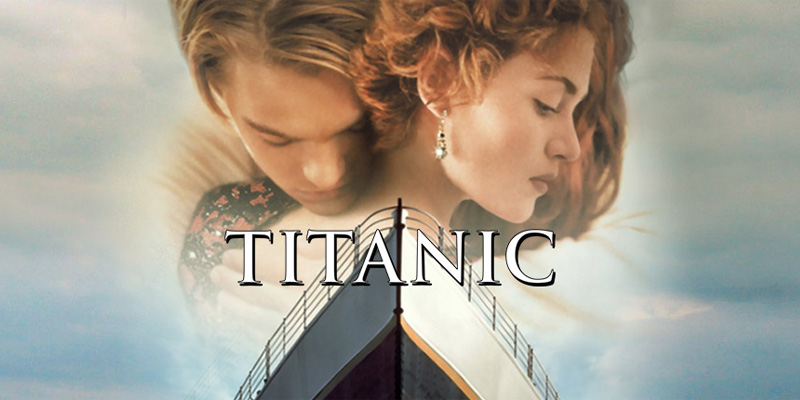

In [23]:
### Titanic DataSet
